<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, timedelta, timezone
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [11]:
raw = skd.load_diabetes()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [6]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [12]:
x_ = x.assign(sex = np.where(x['sex'] > 0, 1, 0))
x_ = pd.get_dummies(x_, columns = ['sex'])
x_.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_0,sex_1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0


In [19]:
bw_score = [KMeans(n_clusters = a).fit(x_.iloc[0:9]).inertia_ for a in range(1, 10)]

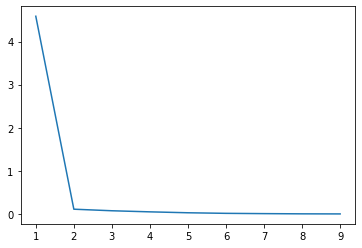

In [22]:
plt.plot(range(1, 10), bw_score)

In [29]:
km = KMeans(n_clusters = 2).fit(x_.iloc[:,0:9])

In [25]:
km_x = x_.copy()
km_x.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_0,sex_1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0


In [31]:
km_x['cl'] = km.labels_
km_x.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_0,sex_1,cl
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1,0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0,1
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1,0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0,1


In [52]:
pca = PCA(n_components=5)
pca_x = pca.fit_transform(x_.iloc[:,0:9])

In [53]:
pca_x

array([[ 0.01758867,  0.08487387,  0.02183014,  0.01228823, -0.04567284],
       [-0.12768648, -0.06684426,  0.00924882,  0.01573014, -0.0478494 ],
       [ 0.00237998,  0.06441314,  0.03372769,  0.0616219 , -0.04670231],
       ...,
       [-0.02085982,  0.03453537,  0.02814063,  0.04855681, -0.00420274],
       [ 0.04222703,  0.01352949, -0.05183679, -0.04344631, -0.02489887],
       [-0.07957236, -0.1875414 ,  0.01672361, -0.0514254 ,  0.07816642]])

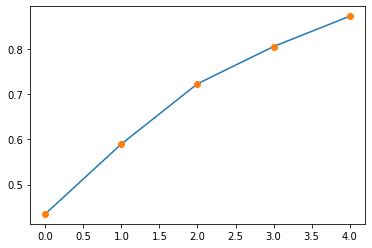

In [47]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), 'o')

In [59]:
pca_x_ = pd.DataFrame(np.c_[pca_x, km.labels_.reshape(-1,1)], columns = [f'pc{a}' for a in range(1,6)] + ['cl'])
pca_x_.head()

,pc1,pc2,pc3,pc4,pc5,cl
0,0.017589,0.084874,0.021830,0.012288,-0.045673,0.0
1,-0.127686,-0.066844,0.009249,0.015730,-0.047849,1.0
2,0.002380,0.064413,0.033728,0.061622,-0.046702,0.0
3,0.010912,-0.004973,-0.103119,-0.038536,0.020592,0.0
4,-0.028179,-0.031364,-0.000832,0.020419,-0.040164,1.0


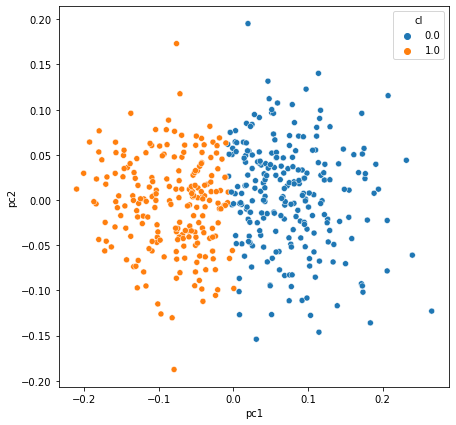

In [60]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = pca_x_, x = 'pc1', y = 'pc2', hue = 'cl')

In [65]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [70]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

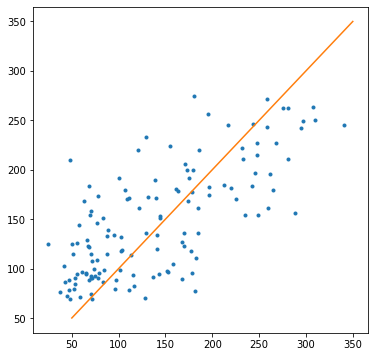

In [74]:
plt.figure(figsize = [6,6])
plt.plot(y_te, pred_rf, '.')
plt.plot([50,350], [50,350])

# Customer Analysis

In [75]:
os.listdir()

['.config',
 'shops.csv',
 'rfm_test.csv',
 'sample_submission.csv',
 'items.csv',
 'retail_data_response.csv',
 'online_retail_II.xlsx',
 '.Rhistory',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_train.csv',
 'item_categories.csv',
 'test.csv',
 'ecommerce-data.csv',
 'retail_data_transactions.csv',
 'sample_data']

In [82]:
df = pd.read_csv('retail_data_transactions.csv')
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [83]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['month'] = df['trans_date'].to_numpy().astype('datetime64[M]')

In [84]:
df.head()

,customer_id,trans_date,tran_amount,month
0,CS5295,2013-02-11,35,2013-02-01
1,CS4768,2015-03-15,39,2015-03-01
2,CS2122,2013-02-26,52,2013-02-01
3,CS1217,2011-11-16,99,2011-11-01
4,CS1850,2013-11-20,78,2013-11-01


In [85]:
df.columns = ['id', 'date', 'rev', 'month']
df.head()

,id,date,rev,month
0,CS5295,2013-02-11,35,2013-02-01
1,CS4768,2015-03-15,39,2015-03-01
2,CS2122,2013-02-26,52,2013-02-01
3,CS1217,2011-11-16,99,2011-11-01
4,CS1850,2013-11-20,78,2013-11-01


In [87]:
df = df.sort_values(['id', 'date'], ascending = [1,0])
df.head()

,id,date,rev,month
5650,CS1112,2015-01-14,39,2015-01-01
31500,CS1112,2014-12-04,59,2014-12-01
17810,CS1112,2014-07-16,90,2014-07-01
26626,CS1112,2014-04-29,63,2014-04-01
74842,CS1112,2013-11-13,71,2013-11-01


In [94]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money')
info_m = info_m.sort_values(['id', 'month'], ascending = [1, 0]).groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,CS1112,39.0
1,CS1113,220.0
2,CS1114,79.0
3,CS1115,55.0
4,CS1116,0.0


In [103]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq')
info_f = info_f.sort_values(['id', 'month'], ascending = [1, 0]).groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,CS1112,1.0
1,CS1113,3.0
2,CS1114,1.0
3,CS1115,1.0
4,CS1116,0.0


In [104]:
df['date'].max()

Timestamp('2015-03-16 00:00:00')

In [105]:
date_now = datetime(2015,4,1)

In [106]:
info_r = df.groupby(['id']).agg({'date': lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,CS1112,77
1,CS1113,51
2,CS1114,48
3,CS1115,27
4,CS1116,219


In [107]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,CS1112,77,1.0,39.0
1,CS1113,51,3.0,220.0
2,CS1114,48,1.0,79.0
3,CS1115,27,1.0,55.0
4,CS1116,219,0.0,0.0


In [110]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,CS1112,77,1.0,39.0,3,4,3
1,CS1113,51,3.0,220.0,2,1,1
2,CS1114,48,1.0,79.0,2,4,2
3,CS1115,27,1.0,55.0,1,4,3
4,CS1116,219,0.0,0.0,5,5,5


In [111]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,recency,freq,money,r,f,m,rf
0,CS1112,77,1.0,39.0,3,4,3,34
1,CS1113,51,3.0,220.0,2,1,1,21
2,CS1114,48,1.0,79.0,2,4,2,24
3,CS1115,27,1.0,55.0,1,4,3,14
4,CS1116,219,0.0,0.0,5,5,5,55


In [112]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [113]:
info.assign(rf = info['rf'].replace(seg_map, regex = True))

,id,recency,freq,money,r,f,m,rf
0,CS1112,77,1.0,39.0,3,4,3,loyal_customers
1,CS1113,51,3.0,220.0,2,1,1,hibernating
2,CS1114,48,1.0,79.0,2,4,2,at_Risk
3,CS1115,27,1.0,55.0,1,4,3,at_Risk
4,CS1116,219,0.0,0.0,5,5,5,champions
...,...,...,...,...,...,...,...,...
6884,CS8996,113,0.0,0.0,4,4,4,loyal_customers
6885,CS8997,277,0.0,0.0,5,4,4,champions
6886,CS8998,100,0.0,0.0,4,4,4,loyal_customers
6887,CS8999,273,0.0,0.0,5,4,4,champions
